<h1><center> An Analysis of the Different Factors that Affect The Priority Level of a 911 Call

Fall 2024 Data Science Project

Collaborators: Ryan Eldho, Tiffany Lu, Akshay Badrinathan, Eli Choi

# **Contributions**

**A: Project idea**

As a group we brainstormed for project ideas before finally landing on Baltimore 911 calls, as it was a huge dataset and we felt that it was interesting enough to test on.

**B: Dataset Curation and Preprocessing**

Tiffany - Removed all the empty data from the 911_calls_for_service.csv.  Got rid of irrelevant columns (Unnamed 0 and Out of Service) and reformatted the priorities into integers to calculate the mean more
easily. Separated the callDateTime column into two columns: Date and Time.

**C: Data Exploration and Summary Statistics**

Akshay - Cleaned data into am and pm call time data frames suitable for processing. Conducted Two Sample T-Test to see if 911 call times (am vs. pm) affected priority of the call, created appropriate boxplots.

Ryan - Created top_10_df for use with any case relating to description, since top_10_df isolates only the top 10 most common descriptions out of all the data. Did chi-square test of description vs. priority, and created visualization to highlight differences in priority for the top 10 incidents.

Eli - Cleaned and separated the district and description data to aggregate the amount of descriptions into the top 5 per district. Ran a chi-squared test to see if the two variables had a statistically significant relationship, but ultimately didn’t use it in the final product as it didn’t fit the question.

Tiffany- Created an analysis for District vs Priority using an ANOVA test. Created a corresponding visualization for this analysis which displayed varying priorities per district. Also, figured out the central tendencies of the 911 calls section which determines the overall statistics for the dataset.

**D: ML Algorithm Design/Development**

Akshay - Worked on Call Time, Description, and District vs. Priority Machine Learning Analysis section. Cleaned data by encoding to transform description and district data to integers, and transformed call time data to time stamps suitable for ML model input.

Ryan - Worked on description v. priority machine learning question. Used logistic regression and TF-IDF for this section.

Tiffany - Worked on the District and Priority section. Altered the data through encoders to fit the Machine Learning models utilized.


**E: ML Algorithm Training and Test Data Analysis**

Akshay - Trained Decision Tree ML model with description, district, and call time as input to predict priority of 911 calls, obtained ~96% accuracy. Created visual accuracy report using seaborn.

Ryan - Trained logistic regression ML model with description and priority to use description to predict the priority of a call, obtaining a 98% accuracy. Created confusion matrix to visualize model results.

Eli - Trained a logistics regression model with district and description to see whether the description could predict the district as accurately as the priority, but found that it was only about 20% accurate in doing so, thus further proving that the main method of determining priority was description.

Tiffany - Trained a logistic regression ML model along with a Decision tree model when determining the the priority of a call based off the districts. Utilized multiple models to determine which model was best when conducting this supervised learning. Furthermore, increased accuracy by 40% by adding another feature (description) after some analytical skills.

**F: Visualization, Result Analysis, Conclusion**

Eli - Wrote out the conclusion along with providing the insights for what we learned, including a short results analysis that successfully answered the question we posed at the beginning.

**G: Final Tutorial Report Creation**

Ryan - Compiled and formatted Exploratory Data Analysis and Visualization section.

Akshay - Compiled and formatted Primary Analysis section

Tiffany - Wrote the Introduction; Compiled and formatted the Data Preprocessing and Exploratory Data Analysis sections.

Eli - Filled in the conclusion and insights section.


# **Introduction**

In this tutorial, we will walk through the entire Data Science Life Cycle. To illustrate this process, we will focus on how various factors influence the priority of 911 calls in Baltimore by answering the following question: "**What factors contribute to the variations in priority levels amongst Baltimore 911 calls?**". These factors include the district where the crime occurred, the type of crime, and the time of the incident. As you may know, Baltimore is often ranked among the top ten most dangerous cities in the United States. There is a lot of useful and interesting information such as the types of calls coming from different regions, the dates during which the crimes happen, and how the police system prioritizes different crimes. We can use this information to inform potential residents like ourselves as to what regions have higher and lower rates of serious crimes, and the police system can use this information to distribute their resources accordingly. Furthermore, the conclusions we gather from this dataset can help assist the police systems in how to prepare for crimes in certain districts and the number of officers that should be on duty at a certain time.




Identifying patterns that directly correlate with high-priority calls could help reduce crime in the city and ultimately improve its safety, potentially removing it from the list of dangerous cities. This is why we chose to use Data Science to identify the key factors behind high-priority calls. This analysis could drive policy changes that make Baltimore a safer community. For instance, discovering that a particular district experiences a higher frequency of high-priority calls than others could result in the allocation of more police resources to that district. Similarly, if a specific crime is more prevalent in Baltimore compared to other cities, targeted policies could be introduced to reduce that crime. Not only would this enhance the quality of life in Baltimore, but it would also lead to more efficient use of existing resources.



**Contents**


*   Data Collection
*   Data Processing
*   Exploratory Analysis and Data Visualization
*   Analysis, Hypothesis Testing, and ML
*   Insights and Conclusions







# **Data Collection**


The Data Collection Stage of the Data Science Life Cycle consists of finding relevant information that assists us in our analysis of 911 calls in Baltimore. One main criterion that we wanted to have in our dataset was plenty of entry points. This would allow us to easily determine any correlation that a factor has on the 911 call with more precision.

Luckily the **Baltimore 911 Dataset** from Kaggle has over 200 thousand 911 calls from 2015 onward. Each call input has details including date, call time, district, district, description, etc. This gives us plenty of information to explore. After clicking on the [Kaggle Dataset](https://www.kaggle.com/datasets/sohier/baltimore-911-calls), download the following dataset. It should show up as **911_calls_for_services.csv** in your Downloads folder. Remember to move it to your project directory!

Besides the dataset, we also need an IDE to develop this project in. We decided to code in Python as there are already plenty of libraries that we can utilize to help us throughout this Data Science Life Cycle. We also decided to work with [Jupyter Notebook](https://www.codecademy.com/article/introducing-jupyter-notebook#:~:text=Jupyter%20Notebook%20is%20a%20type,%2C%20debugging%2C%20and%20code%20completion.) as you're able to easily write Python code with it.

Before we start utilizing the libraries, we must import them within the Jupyter Notebook. Some common libraries that we will be utilizing are [Pandas](https://pandas.pydata.org/docs/user_guide/index.html), [NumPy](https://numpy.org/doc/stable/user/), [SeaBorn](https://seaborn.pydata.org/tutorial/introduction.html), and [PyPlot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html).

**Reasons Why We Use Each Library**

Pandas is a powerful Python library for data manipulation and analysis, offering flexible data structures like DataFrames and Series to efficiently handle, clean, and transform data. It supports various operations such as filtering, grouping, aggregation, and handling missing values, making it essential for tasks like data cleaning, exploration, and time series analysis.

NumPy is a fundamental Python library for numerical computing, providing efficient array objects and a wide range of mathematical functions for operations on large datasets.

Seaborn is a Python visualization library that simplifies the process of generating complex plots like heatmaps, boxplots, and line plots while integrating well with Pandas data structures. Seaborn is widely used for data exploration and visualizing relationships in datasets, especially in statistical analysis.

Pyplot is a module in Matplotlib that also offers functions to generate basic charts for visualization like line plots, bar charts, histograms, and scatter plots. Pyplot is used for its flexibility in creating custom plots for data analysis.

Below are the imports that you must have before we continue with **Data Processing!**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import scipy.stats as stats

from collections import Counter
from scipy.stats import chi2_contingency
import scipy.stats as stats

from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score, ConfusionMatrixDisplay

from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
import seaborn as sns

import ast
pd.set_option('display.max_columns', None)
from scipy.spatial.distance import cdist

import warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

<a id="data-processing"></a>
# **Data Processing**

Now we have our dataset picked out and our libraries imported, we have to turn process our data in order to get rid of any "dirty data" that may mess with our analysis.

Dirty data typically deals with data that are structured incorrectly, data that are missing, and data that is inaccurate.

Before we are able to do that though, we have to turn our csv file into a data frame to make manipulating the data much easier to do.

## **Initial Data Preprocessing**

In [ ]:
df = pd.read_csv('911_calls_for_service.csv')
df

,Unnamed: 0,callDateTime,priority,district,description,callNumber,incidentLocation,location
0,0,2015-07-13 10:41:00,Medium,CD,SEE TEXT,P151941002,0 N CALVERT ST,"(39.2899299,-76.6123462)"
1,1,2015-07-13 10:47:00,Medium,CD,911/NO VOICE,P151941003,600 E FAYETTE ST,"(39.2906737,-76.6071600)"
2,2,2015-07-13 10:42:00,Medium,CD,911/NO VOICE,P151941004,200 E BALTIMORE ST,"(39.2898910,-76.6120720)"
3,3,2015-07-13 10:45:00,Low,CD,PRKG COMPLAINT,P151941005,800 PARK AV,"(39.2985163,-76.6184754)"
4,4,2015-07-13 10:46:00,Medium,SW,AUTO THEFT,P151941006,3500 CLIFTON AV,"(39.3112130,-76.6763150)"
...,...,...,...,...,...,...,...,...
2799909,2799909,2017-08-21 11:44:00,Medium,NW,BURGLARY,P172331036,2900 VIOLET AV,"(39.3297550,-76.6624990)"
2799910,2799910,2017-08-21 11:44:00,Low,NE,GET BELONGINGS,P172331037,2900 GLENMORE AV,"(39.3571560,-76.5608350)"
2799911,2799911,2017-08-21 11:46:00,Medium,CD,JUV DISTURBANCE,P172331039,1000 W NORTH AV,"(39.3104606,-76.6347099)"
2799912,2799912,2017-08-21 11:45:00,Medium,ED,COMMON ASSAULT,P172331041,1500 E BIDDLE ST,"(39.3041617,-76.5979135)"


Now to begin our data processing, we have to determine how many features and columns our data frame has. Along with this, we will also check how many missing values are in our dataset.



In [ ]:
print(df.shape)
print(df.isna().sum())

(2799914, 8)
Unnamed: 0             0
callDateTime           0
priority            6655
district               0
description            0
callNumber             0
incidentLocation       0
location               0
dtype: int64


Since the only missing value is priority and it makes up only **0.238%** of the dataset, we can just drop it. This avoids us dealing with null data.

After looking at each of the columns, we can see that there's a column **Unnamed:0** which doesn't make sense in the context of the analysis. We can remove this column entirely. Furthermore, callTime and Data are combined together into one column. We will have to restructure this to create a **Date column** and **Time column**. This will allow us to deduce more patterns based on these features.

In [ ]:
new_df = df.drop(columns = ['Unnamed: 0'])

# Split up the date and time
new_df[['date', 'time']] = new_df['callDateTime'].str.split('\s', expand = True)
new_df = new_df.drop(columns = ['callDateTime'])

# Move the date and time columns towards the front
date_col = new_df.pop('date')
time_col = new_df.pop('time')
new_df.insert(0, 'time', time_col)
new_df.insert(0, 'date', date_col)

# Drop all the NA values

new_df = new_df.dropna(subset = ['date', 'time', 'priority', 'district', 'description', 'callNumber', 'incidentLocation', 'location'])

# Rename the Columns
new_df['coordinates'] = new_df['location']
new_df = new_df.drop(columns = ['location'])
new_df['location'] = new_df['incidentLocation']
new_df = new_df.drop(columns = ['incidentLocation'])


new_df

<ipython-input-78-cd227b5a86f2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['coordinates'] = new_df['location']


,date,time,priority,district,description,callNumber,coordinates,location
0,2015-07-13,10:41:00,Medium,CD,SEE TEXT,P151941002,"(39.2899299,-76.6123462)",0 N CALVERT ST
1,2015-07-13,10:47:00,Medium,CD,911/NO VOICE,P151941003,"(39.2906737,-76.6071600)",600 E FAYETTE ST
2,2015-07-13,10:42:00,Medium,CD,911/NO VOICE,P151941004,"(39.2898910,-76.6120720)",200 E BALTIMORE ST
3,2015-07-13,10:45:00,Low,CD,PRKG COMPLAINT,P151941005,"(39.2985163,-76.6184754)",800 PARK AV
4,2015-07-13,10:46:00,Medium,SW,AUTO THEFT,P151941006,"(39.3112130,-76.6763150)",3500 CLIFTON AV
...,...,...,...,...,...,...,...,...
2799909,2017-08-21,11:44:00,Medium,NW,BURGLARY,P172331036,"(39.3297550,-76.6624990)",2900 VIOLET AV
2799910,2017-08-21,11:44:00,Low,NE,GET BELONGINGS,P172331037,"(39.3571560,-76.5608350)",2900 GLENMORE AV
2799911,2017-08-21,11:46:00,Medium,CD,JUV DISTURBANCE,P172331039,"(39.3104606,-76.6347099)",1000 W NORTH AV
2799912,2017-08-21,11:45:00,Medium,ED,COMMON ASSAULT,P172331041,"(39.3041617,-76.5979135)",1500 E BIDDLE ST


Now if we check again, we have separate date and time columns. Also, now if we check for any NaN values, there shouldn't be any.

In [ ]:
print(new_df.isna().sum())

date           0
time           0
priority       0
district       0
description    0
callNumber     0
coordinates    0
location       0
dtype: int64


## **Creating updated_priority_df**

The priorities must be converted to numerical values for future use. updated_priority_df does exactly that.

Get all the districts and priority types:

In [ ]:
print(new_df['district'].unique())
print(new_df['priority'].unique())

print(new_df[new_df['priority'] == 'Out of Service'].shape)

['CD' 'SW' 'ND' 'WD' 'NE' 'SE' 'SD' 'CW' 'NW' 'ED' 'TRU' 'SS' 'EVT2'
 'INFO' 'EVT1' 'EVT3' 'FIR1' 'HP']
['Medium' 'Low' 'High' 'Non-Emergency' 'Out of Service' 'Emergency']
(803, 8)


Since "Out of Service" isn't really a measure of priority, we are going to drop it.


In [ ]:
updated_priority_df = new_df.drop(new_df[new_df['priority'] == 'Out of Service'].index)

We are going to update the priority to scale it from 1-5 in order to be able to express the mean of the priorities per district. Originally the priority were of type Objects which we wouldn't be able to calculate the mean of. This is why we turn it into an int following the key below.

1: Non-Emergency

2: Low

3: Medium

4: High

5: Emergency

In [ ]:
updated_priority_df.loc[updated_priority_df['priority'] == 'Non-Emergency', 'priority'] = '1'
updated_priority_df.loc[updated_priority_df['priority'] == 'Low', 'priority'] = '2'
updated_priority_df.loc[updated_priority_df['priority'] == 'Medium', 'priority'] = '3'
updated_priority_df.loc[updated_priority_df['priority'] == 'High', 'priority'] = '4'
updated_priority_df.loc[updated_priority_df['priority'] == 'Emergency', 'priority'] = '5'
updated_priority_df['priority'] = updated_priority_df['priority'].apply(int)

## **Creating top_10_df**

For any code that deals specifically with descriptions, we use a modified df called "top_10_df". The data has so many different descriptions and also has many descriptions which mean the same thing, but differ in spelling. So, we first filter for only the top 10 most popular descriptions, which leaves us with ~1.4 million data points to use. The "updated_priority_df" is used, which has already converted the priority into a number.

In [ ]:
top_10_common_desc = updated_priority_df['description'].value_counts().head(10).index.tolist()
top_10_df = updated_priority_df[updated_priority_df['description'].isin(top_10_common_desc)]
top_10_df

,date,time,priority,district,description,callNumber,coordinates,location
1,2015-07-13,10:47:00,3,CD,911/NO VOICE,P151941003,"(39.2906737,-76.6071600)",600 E FAYETTE ST
2,2015-07-13,10:42:00,3,CD,911/NO VOICE,P151941004,"(39.2898910,-76.6120720)",200 E BALTIMORE ST
5,2015-07-13,10:47:00,3,ND,FAMILY DISTURB,P151941007,"(39.3208510,-76.6147390)",2700 N CALVERT ST
6,2015-07-13,10:46:00,4,WD,SILENT ALARM,P151941008,"(39.3097096,-76.6513109)",2100 W NORTH AV
7,2015-07-13,10:49:00,2,SW,AUTO ACCIDENT,P151941010,"(39.2756929,-76.6664179)",3100 WILKENS AV
...,...,...,...,...,...,...,...,...
2799904,2017-08-21,11:42:00,3,ED,911/NO VOICE,P172331029,"(39.3029101,-76.5728709)",1000 EDISON HY
2799907,2017-08-21,11:43:00,4,CD,SILENT ALARM,P172331034,"(39.3115410,-76.6372050)",2300 MADISON AV
2799908,2017-08-21,11:43:00,3,NW,FAMILY DISTURB,P172331035,"(39.3343844,-76.6843751)",4000 BOARMAN AV
2799912,2017-08-21,11:45:00,3,ED,COMMON ASSAULT,P172331041,"(39.3041617,-76.5979135)",1500 E BIDDLE ST


# **Exploratory Data Analysis and Visualizations**

For Exploratory Data Analysis and Visualizations, we will focus on specific features in different questions and run statistical tests comparing key features such as District v. Priority, Central Tendencies of 911 calls, Description v. Priority, and Call Times (AM and PM) v. Priority

## **Analysis: District vs. Priority:**

It is unclear whether certain districts in Baltimore deal with more dangerous crimes compared to other districts. With an ANOVA test, we can conclude whether the district has an impact of the priority that the crime is considered to the police force.

*H0:* The district of where the crime was commited does not have an effect on the priority of the 911 call.     

*HA:* The district of where the crime was commited does have an effect on the priority of the 911 call.     


We're now going to find the average priority per district and graph it. updated_priority_df is used since it has converted priority to numerical values.

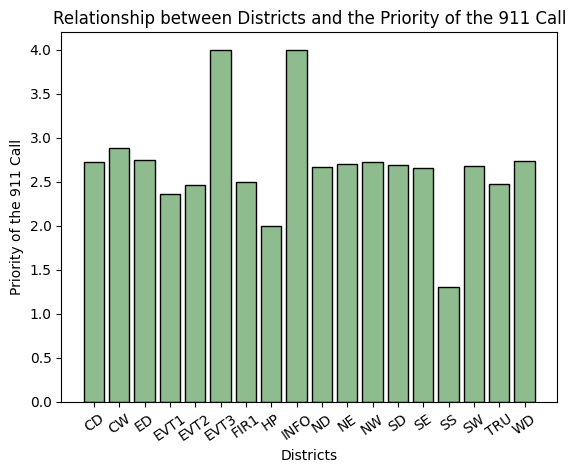

In [ ]:
average_priority = updated_priority_df.groupby("district")["priority"].mean()
plt.bar(average_priority.index, average_priority.values, color = 'darkseagreen', edgecolor = 'black')
plt.xticks(rotation = 35)
plt.xlabel("Districts")
plt.ylabel("Priority of the 911 Call")
plt.title("Relationship between Districts and the Priority of the 911 Call")
plt.show()

We are going to conduct an ANOVA test to see if the districts actually has an influence on the average priority of the call that is gathered from that district.

In [ ]:
CD_df = updated_priority_df[updated_priority_df['district'] == 'CD']['priority']
CW_df = updated_priority_df[updated_priority_df['district'] == 'CW']['priority']
ED_df = updated_priority_df[updated_priority_df['district'] == 'ED']['priority']
EVT1_df = updated_priority_df[updated_priority_df['district'] == 'EVT1']['priority']
EVT2_df = updated_priority_df[updated_priority_df['district'] == 'EVT2']['priority']
EVT3_df = updated_priority_df[updated_priority_df['district'] == 'EVT3']['priority']
FIR1_df = updated_priority_df[updated_priority_df['district'] == 'FIR1']['priority']
HP_df = updated_priority_df[updated_priority_df['district'] == 'HP']['priority']
INFO_df = updated_priority_df[updated_priority_df['district'] == 'INFO']['priority']
ND_df = updated_priority_df[updated_priority_df['district'] == 'ND']['priority']
NE_df = updated_priority_df[updated_priority_df['district'] == 'NE']['priority']
NW_df = updated_priority_df[updated_priority_df['district'] == 'NW']['priority']
SD_df = updated_priority_df[updated_priority_df['district'] == 'SD']['priority']
SE_df = updated_priority_df[updated_priority_df['district'] == 'SE']['priority']
SS_df = updated_priority_df[updated_priority_df['district'] == 'SS']['priority']
SW_df = updated_priority_df[updated_priority_df['district'] == 'SW']['priority']
TRU_df = updated_priority_df[updated_priority_df['district'] == 'TRU']['priority']
WD_df = updated_priority_df[updated_priority_df['district'] == 'WD']['priority']

result = stats.f_oneway(CD_df, CW_df, ED_df, EVT1_df, EVT2_df, EVT3_df, FIR1_df, HP_df
                        , INFO_df, ND_df, NE_df, NW_df, SD_df, SE_df, SS_df, SW_df, TRU_df
                        , WD_df)

print("p-value: " + str(result.pvalue))
print("Min-value: " + str(average_priority.min()))
print("Max-value: " + str(average_priority.max()))

p-value: 0.0
Min-value: 1.3039298161278692
Max-value: 4.0


## **Conclusion: District vs. Priority:**


With a significance level (α) of 0.05, we require a p-value less than or equal to α (p ≤ 0.05) to reject the null hypothesis. Since the p-value is 0.0, we can reject the null hypothesis as 0.0 ≤ 0.05. This supports the alternative hypothesis: **The district where the crime occurred does influence the priority of the 911 call.** This suggests that different districts handle calls with varying average priorities. The minimum priority rating across all districts is 1.3, categorized as "Low Priority." According to the bar chart, District SS has the lowest average call priority in Baltimore. On the other hand, the maximum priority rating is 4.0, and the bar chart shows that Districts EVT3 and INFO have the highest average call priorities, indicating that their calls are generally classified as "High Priority."

## **Analysis: Central Tendacies of Number of 911 Calls**

Baltimore is considered one of the most dangerous cities within the United States. A question that can be brought up is **what the overall call priority is for the entire city.** Another question that can be brought up is what is the number of 911 calls per district and which district has the most/least amount of calls.

In [ ]:
# grab the most common call priority
print("Overall Call Priority: " + new_df['priority'].mode())

# grab the number of calls per districts
number_of_calls_df = updated_priority_df.groupby('district').size().reset_index(name='numberOfCalls')
number_of_calls_df

0    Overall Call Priority: Medium
Name: priority, dtype: object


,district,numberOfCalls
0,CD,306837
1,CW,37236
2,ED,262571
3,EVT1,39
4,EVT2,43
5,EVT3,10
6,FIR1,2
7,HP,2
8,INFO,11
9,ND,280099


Create a box plot to show the distribution of calls that each district gets. Each data point is the total number of calls that is associated with a district. There should be 18 data points.

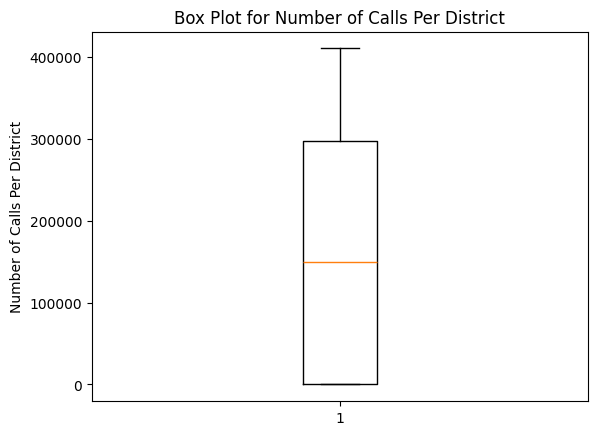

In [ ]:
fig, ax = plt.subplots()
boxplot_stats = ax.boxplot(number_of_calls_df['numberOfCalls'])
ax.set_ylabel("Number of Calls Per District")
ax.set_title("Box Plot for Number of Calls Per District")
plt.show()

Get descriptive statistics for the box plot.

In [ ]:
min_value = boxplot_stats['whiskers'][0].get_ydata()[1]
max_value = boxplot_stats['whiskers'][1].get_ydata()[1]
median_value = boxplot_stats['medians'][0].get_ydata()[0]

print("The minimum value from the boxplot is: " + str(min_value))
print("The maximum value from the boxplot is: " + str(max_value))
print("The median value from the boxplot is: " + str(median_value))

The minimum value from the boxplot is: 2.0
The maximum value from the boxplot is: 409919.0
The median value from the boxplot is: 149903.5


## **Conclusion: Central Tendacies of Number of 911 Calls**

It can be concluded that the typical call in Baltimore City falls under the "Medium Priority" category. Crimes such as burglary, common assault, and auto theft are examples of incidents classified as "Medium Priority," highlighting some of the common offenses in Baltimore.

After analyzing the number of calls per district, it's notable that districts EVT1, EVT2, EVT3, FIR1, HP, and INFO have only a few calls compared to the hundreds of thousands recorded in other districts. To explore this disproportionate distribution, a boxplot was generated to check for outliers. However, the boxplot does not indicate any outliers from the dataset. In fact, the minimum value shown on the boxplot is 2, which aligns with the minimum value in the "numberOfCalls" column.


The data also reveals that District NE has the highest number of 911 calls, with 409,919 calls recorded, making it the maximum value in the boxplot. Although the dataset covers the period from 2015 to the present, the 409,919 calls from District NE highlight the frequency of crime in this area. Additionally, the median number of calls across all districts is 149,903.

## **Analysis: Description vs. Priority**




It is important to determine how the police department ranks the priority certain situations and crimes compared to others. With a Chi-Squared test, we can determine how the descriptions of calls end up being prioritized.

H0: The description of a crime does not have an effect on the priority of the 911 call.

HA: The description of a crime does have an effect on the priority of the 911 call.

A crosstab with the top 10 most popular descriptions (top_10_df) is taken

In [ ]:
crosstab = pd.crosstab(top_10_df['description'], top_10_df['priority'])
crosstab

priority,1,2,3,4
description,,,,
911/NO VOICE,0,2,457467,0
AUTO ACCIDENT,1,106896,2818,25
COMMON ASSAULT,0,8,117475,270
DISORDERLY,1,4,237979,220
FAMILY DISTURB,1,2,68107,41
NARCOTICSOutside,0,0,95841,3
OTHER,5,60646,1062,141
Repairs/Service,67050,0,0,0
SILENT ALARM,0,0,2,78618


Because some of the priorities have extremely high frequencies, a logarithmic scale for the y-axis is used to better display some of the more non-frequent priorities.

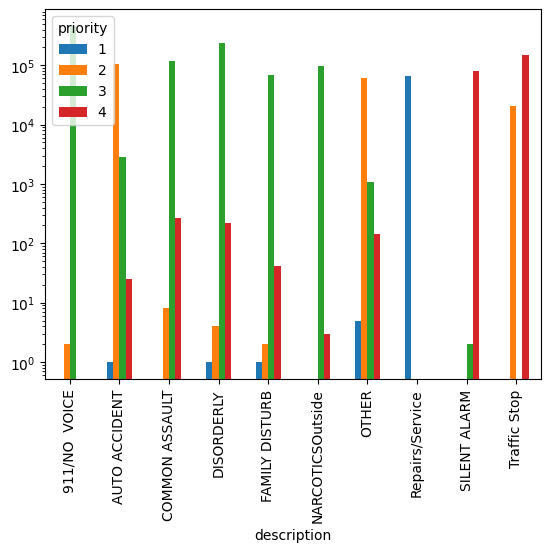

In [ ]:
crosstab.plot(kind="bar")
plt.yscale("log")
plt.show()

In [ ]:
chi2, p_value, _, _ = stats.chi2_contingency(crosstab)
print("The p-value is " + p_value.__str__())

The p-value is 0.0


## **Conclusion: Description vs. Priority:**


Since out significance levels is 0.0, we must reject the null hypothesis since it is less than our alpha value of 0.05. **This means that the description of a crime does have an effect on the priority of the 911 call.** Our data also shows that 6 of the 10  most popular crimes have a priority of 3. Traffic stops and silent alarms have a high proportion of incidences with a priority of 4. And repairs/service are entirely categorized with a priority of 1.

## **Analysis: Call Times (AM vs. PM) and Priority**

In Baltimore, the priority of a call may vary depending on if the call is made in the AM vs. PM. With a Two-Sample T test, we can assess if the timing of a 911 call made in Baltimore has an impact on the priority of the call.

HO: The timing of the call does not have an impact on its priority.

HA: The timing of the call has an impact on its priority.



Let's first display all of the unique priorities, the unique call times, and the number of unique call times. The "Out of Service" priority rows can be dropped as it is an invalid call

In [ ]:
new_df = new_df.drop(new_df[new_df['priority'] == 'Out of Service'].index)
print(new_df['priority'].unique())
print(new_df['time'].unique())
print(len(new_df['time'].unique()))

['Medium' 'Low' 'High' 'Non-Emergency' 'Emergency']
['10:41:00' '10:47:00' '10:42:00' ... '04:36:00' '06:41:00' '07:16:00']
1440


Split the DataFrame into 2 separate DataFrames such that one contains all AM call times (from 00:00:00 to 11:59:59) and the other contains all PM call times (from 12:00:00 to 23:59:59).

In [ ]:
new_df = new_df.dropna(subset = ['date', 'time', 'priority', 'district', 'description', 'callNumber', 'location'])
new_df["time"] = pd.to_datetime(new_df['time'], format='%H:%M:%S').dt.time
am_calls_df = pd.DataFrame()
am_calls_df = new_df[(new_df["time"] > pd.to_datetime('00:00:00').time()) & (new_df["time"] <= pd.to_datetime('11:59:59').time())]
pm_calls_df = pd.DataFrame()
pm_calls_df = new_df[(new_df["time"] > pd.to_datetime('11:59:59').time()) & (new_df["time"] <= pd.to_datetime('23:59:59').time())]

Quantify the priorities in the AM and PM DataFrames such that corresponding priorities are assigned a value 1 - 5.

1: Non-Emergency

2: Low

3: Medium

4: High

5: Emergency

This will allow for a way to calculate the mean priority of calls made in the AM vs. PM.

In [ ]:
am_calls_df.loc[am_calls_df['priority'] == 'Non-Emergency', 'priority'] = '1'
am_calls_df.loc[am_calls_df['priority'] == 'Low', 'priority'] = '2'
am_calls_df.loc[am_calls_df['priority'] == 'Medium', 'priority'] = '3'
am_calls_df.loc[am_calls_df['priority'] == 'High', 'priority'] = '4'
am_calls_df.loc[am_calls_df['priority'] == 'Emergency', 'priority'] = '5'
am_calls_df['priority'] = am_calls_df['priority'].apply(int)

pm_calls_df.loc[pm_calls_df['priority'] == 'Non-Emergency', 'priority'] = '1'
pm_calls_df.loc[pm_calls_df['priority'] == 'Low', 'priority'] = '2'
pm_calls_df.loc[pm_calls_df['priority'] == 'Medium', 'priority'] = '3'
pm_calls_df.loc[pm_calls_df['priority'] == 'High', 'priority'] = '4'
pm_calls_df.loc[pm_calls_df['priority'] == 'Emergency', 'priority'] = '5'
pm_calls_df['priority'] = pm_calls_df['priority'].apply(int)

<ipython-input-94-dc8705166ba5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  am_calls_df['priority'] = am_calls_df['priority'].apply(int)
<ipython-input-94-dc8705166ba5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm_calls_df['priority'] = pm_calls_df['priority'].apply(int)


Calculate the mean priority value for both the AM and PM calls.

In [ ]:
am_average_priority = am_calls_df["priority"].mean()
pm_average_priority = pm_calls_df["priority"].mean()
print("AM Call Avg. Priority:", am_average_priority)
print("PM Call Avg. Priority:", pm_average_priority)

AM Call Avg. Priority: 2.6730598227382085
PM Call Avg. Priority: 2.710892729263101


Conduct Two-Sample T-Test because we want to see if two independent samples (AM vs. PM calls) are similar in terms of their mean call priority.

In [ ]:
t_stat, p_value = stats.ttest_ind(am_calls_df["priority"], pm_calls_df["priority"])
print("T-Statistic:", t_stat)
print("p-value:", p_value)

T-Statistic: -34.60294924530181
p-value: 2.594260948597462e-262


Plot the Two-Sample T-Test results for visualization purposes.

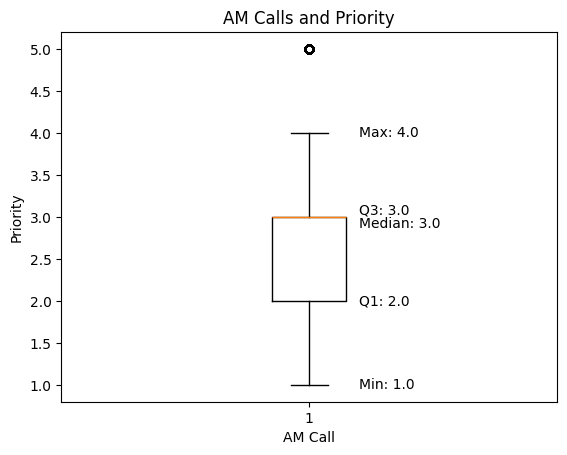

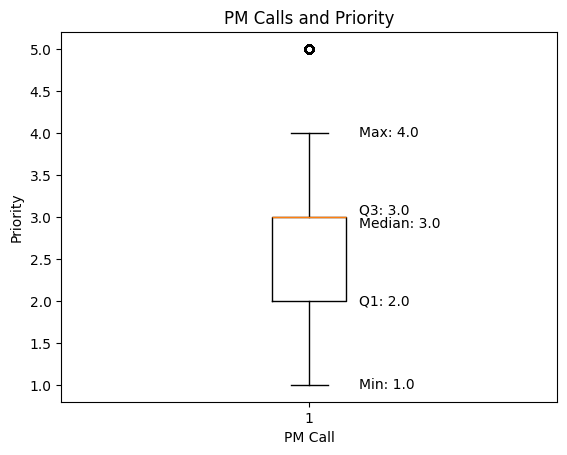

In [ ]:
fig, ax1 = plt.subplots()
boxplot_stats1 = plt.boxplot(am_calls_df["priority"])
plt.xlabel("AM Call")
plt.ylabel("Priority")
plt.title("AM Calls and Priority")
min_value = boxplot_stats1['whiskers'][0].get_ydata()[1]
max_value = boxplot_stats1['whiskers'][1].get_ydata()[1]
median_value = boxplot_stats1['medians'][0].get_ydata()[0]
q1 = boxplot_stats1['boxes'][0].get_ydata()[1]
q3 = boxplot_stats1['boxes'][0].get_ydata()[2]
ax1.text(1.1, median_value, f'Median: {median_value}', verticalalignment='top')
ax1.text(1.1, q1, f'Q1: {q1}', verticalalignment='center')
ax1.text(1.1, q3, f'Q3: {q3}', verticalalignment='bottom')
ax1.text(1.1, min_value, f'Min: {min_value}', verticalalignment='center')
ax1.text(1.1, max_value, f'Max: {max_value}', verticalalignment='center')
plt.show()

fig, ax2 = plt.subplots()
boxplot_stats2 = plt.boxplot(pm_calls_df["priority"])
plt.xlabel("PM Call")
plt.ylabel("Priority")
plt.title("PM Calls and Priority")
min_value = boxplot_stats2['whiskers'][0].get_ydata()[1]
max_value = boxplot_stats2['whiskers'][1].get_ydata()[1]
median_value = boxplot_stats2['medians'][0].get_ydata()[0]
q1 = boxplot_stats2['boxes'][0].get_ydata()[1]
q3 = boxplot_stats2['boxes'][0].get_ydata()[2]
ax2.text(1.1, median_value, f'Median: {median_value}', verticalalignment='top')
ax2.text(1.1, q1, f'Q1: {q1}', verticalalignment='center')
ax2.text(1.1, q3, f'Q3: {q3}', verticalalignment='bottom')
ax2.text(1.1, min_value, f'Min: {min_value}', verticalalignment='center')
ax2.text(1.1, max_value, f'Max: {max_value}', verticalalignment='center')
plt.show()

## **Conclusion: Call Times (AM vs. PM) and Priority**



A p-value less than or equal to α = 0.05 will lead us to reject the null hypothesis. Since the p-value is ~0.0, we can reject the null hypothesis as 0.0 ≤ 0.05. This supports the alternative hypothesis: **The timing of the call has an impact on its priority.** This suggests that the timing of the call might cause it to be characterized differently, and therefore, handled differntly by the 911 operator. Reasons for this could be that there are more 911 operators at a certain time of the day, they are perhaps receving less calls during a certain time of the day thus they can focus more on the calls they do receive within that timeframe, etc.

# **Primary Analysis**


To reiterate, the question we are trying to explore further is "**What factors contribute to the variations in priority levels amongst Baltimore 911 calls?**" Seeing the results of the **Exploratory Data Analysis** section, we can see the main takeaways that the various statistical test results indicate are as follow:

1. The district where the crime occurred does influence the priority of the 911 call.

2. The description of a crime does have an effect on the priority of the 911 call.

3. The timing of the call has an impact on its priority.

So, let's train ML models that treat a combination of these 3 main factors (district, description, and time) as inputs, and analyze which factor is the main contributor to priority of a 911 call.

### **Machine Learning Analysis: Using Call Times, District, and Description to Predict Priority**

To see how the factors we have observed thus far (time, district, description) affect the priority of a 911 call in Baltimore, we can see if a Decision Tree can accurately model and classify datapoints into their respective priorities by solely relying on these 3 features. The DataFrame call_time_df is only the columns pertaining to time, description, district, and priority. The time, descprition, and district columns are part of the inputs, and priority column is the output.

In [ ]:
new_df = new_df.drop(new_df[new_df['priority'] == 'Out of Service'].index)
new_df = new_df.dropna(subset = ['date', 'time', 'priority', 'district', 'description', 'callNumber', 'location'])
new_df["time"] = pd.to_datetime(new_df['time'], format='%H:%M:%S').dt.time

call_time_df = new_df[['time', 'district', 'description', 'priority']]

top_10_common_desc = call_time_df['description'].value_counts().head(10).index.tolist()
call_time_df['time'] = call_time_df['time'].apply(lambda time: time.hour * 3600 + time.minute * 60 + time.second)

call_time_df.loc[call_time_df['priority'] == 'Non-Emergency', 'priority'] = '1'
call_time_df.loc[call_time_df['priority'] == 'Low', 'priority'] = '2'
call_time_df.loc[call_time_df['priority'] == 'Medium', 'priority'] = '3'
call_time_df.loc[call_time_df['priority'] == 'High', 'priority'] = '4'
call_time_df.loc[call_time_df['priority'] == 'Emergency', 'priority'] = '5'
call_time_df['priority'] = call_time_df['priority'].apply(int)

# Use label encoding to transform non-numerical data to numerical values
encoder = LabelEncoder()
call_time_df['district'] = encoder.fit_transform(call_time_df['district'])
call_time_df['description'] = encoder.fit_transform(call_time_df['description'])

X_call = call_time_df.drop(columns = 'priority')
y_call = call_time_df['priority']

X_train_call, X_test_call, y_train_call, y_test_call = train_test_split(X_call, y_call, test_size = 0.2, random_state = 42)

<ipython-input-98-bd20fb4e3202>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_time_df['time'] = call_time_df['time'].apply(lambda time: time.hour * 3600 + time.minute * 60 + time.second)
<ipython-input-98-bd20fb4e3202>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_time_df['priority'] = call_time_df['priority'].apply(int)
<ipython-input-98-bd20fb4e3202>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

We will standardize the input columns so they all have equal contribution in influencing the Decision Tree Model. From there, we will do a K-fold Cross Validation to see how accurate the Decision Tree Model could actually be in predicting the priority of a call based only on time, description, and district.

In [ ]:
# Scaler training and test sets
scaler = StandardScaler()
X_train_call_scaled = scaler.fit_transform(X_train_call)
X_test_call_scaled = scaler.transform(X_test_call)

# K-fold Cross Validation for Decision Tree Model
k_folds = 5
seed = 42
skf = StratifiedKFold(n_splits = k_folds, shuffle = True, random_state = seed)
dec_tree_model = DecisionTreeClassifier()
np.random.seed(seed)
res = cross_val_score(dec_tree_model, X_train_call_scaled, y_train_call, cv = skf, error_score = 'raise')
print("Model Name:", 'Decision Tree')
print("Cross Validation Mean:", res.mean())
print("Cross Validation Standard Deviation:", res.std())

Model Name: Decision Tree
Cross Validation Mean: 0.960451018805281
Cross Validation Standard Deviation: 0.00013786425786886054


The Decision Tree Model had a ~96% accuracy in the K-fold Cross Validation test, which is great. So, we can move further and formally fit, traing, and predict our data using the Decision Tree Classifier. Below, the classification report is shown in a printed and visual capacity. The corresponding scores show how accurate the model was in predicting the priorities of 1, 2, 3, 4, and 5 based on the input features of time, description, and district.

In [ ]:
dec_tree_model.fit(X_train_call_scaled, y_train_call)
y_pred = dec_tree_model.predict(X_test_call_scaled)
accuracy = accuracy_score(y_test_call, y_pred)
class_report = classification_report(y_test_call, y_pred)

print(f"Accuracy of 'Decision Tree: {accuracy:.2f}")
print(class_report)

Accuracy of 'Decision Tree: 0.96
              precision    recall  f1-score   support

           1       0.95      0.97      0.96     64031
           2       0.93      0.92      0.93    127878
           3       0.98      0.97      0.98    279877
           4       0.95      0.99      0.97     86477
           5       0.95      0.97      0.96       229

    accuracy                           0.96    558492
   macro avg       0.95      0.96      0.96    558492
weighted avg       0.96      0.96      0.96    558492



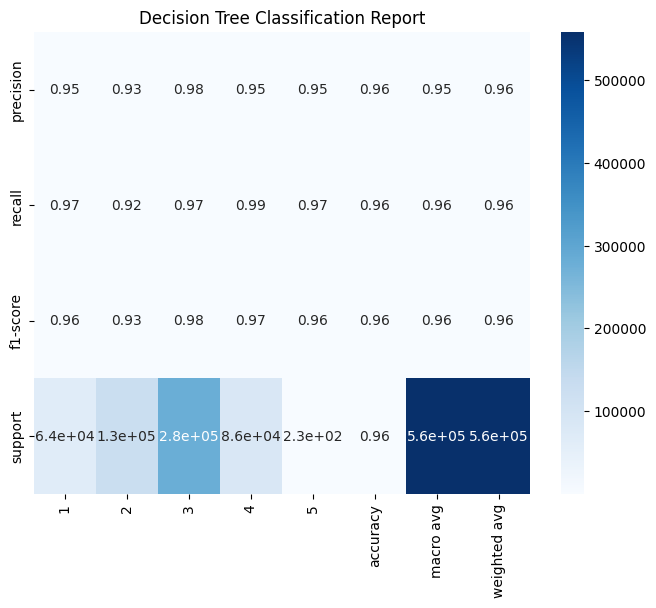

In [ ]:
visual_class_report = classification_report(y_test_call, y_pred, output_dict = True)

df_class_report = pd.DataFrame(visual_class_report).transpose()

plt.figure(figsize = (8, 6))
sns.heatmap(df_class_report.T, annot = True, cmap = 'Blues')
plt.title('Decision Tree Classification Report')
plt.show()

### **Machine Learning Analysis: Using Description to Predict Priority**

The goal for this section is to see how accurately a machine learning model can predict the priority of a report based on words in the description. Since we are dealing with text data, we will use TF-IDF to transform text into numerical features and only highlight key terms. Afterwards, we will train a logistic regression model to predict priority based on description.

Utilize the top_10_df from earlier to extract the descriptions


In [ ]:
descriptions = top_10_df['description'].tolist()

Utilize the vectorizer to generate a numerical feature matrix that can be used with logistic regression using one word sequences. Common words like "the" and "of" are removed with stop_words='english'

In [ ]:
vectorizer = TfidfVectorizer(ngram_range = (1,1), stop_words='english')
tfidf_matrix = vectorizer.fit_transform(descriptions)

In [ ]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['911', 'accident', 'alarm', 'assault', 'auto', 'common',
       'disorderly', 'disturb', 'family', 'narcoticsoutside', 'repairs',
       'service', 'silent', 'stop', 'traffic', 'voice'], dtype=object)

The LabelEncoder converts the string labels into numbers. We then split the data such that 80% is train, 20% is test. A LogisticRegression model is trained with 1000 iterations, and fitted on the train data. The trained model then predicts a y_pred, and the report is printed.


In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(top_10_df['priority'])

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred), labels=[1,2,3,4]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13405
           2       0.98      0.89      0.93     37526
           3       1.00      1.00      1.00    196213
           4       0.92      1.00      0.95     45376

    accuracy                           0.98    292520
   macro avg       0.97      0.97      0.97    292520
weighted avg       0.98      0.98      0.98    292520



In the above classification report, we see that all priorities have a high value for f1-score, which balances precision and recall. The accuracy was also relatively high at 0.98. Below, we generate a confusion matrix to visualize the models performance. The model performs very well for all priorities. For priority 1, all test data was properly classified. 2, 3, and 4 didn't have perfect accuracy, but were still very well performing.

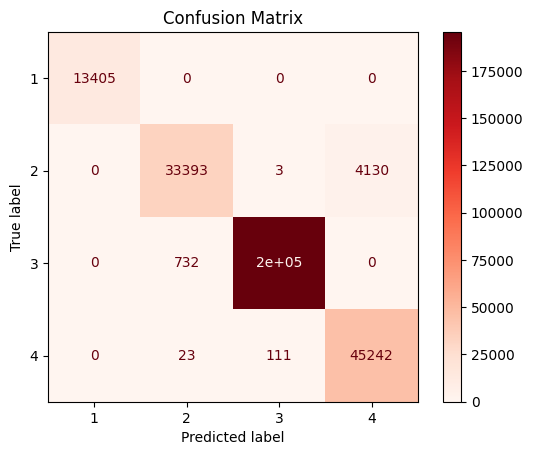

In [ ]:
cm = confusion_matrix(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred), labels=[1,2,3,4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

### **Machine Learning Analysis: Using District to Predict Priority**

This section will explore whether the district of a 911 call influences the priority under which the call is classified. To investigate the impact of the district on the priority, we will apply supervised learning by training the model with existing data. We will use K folds to determine which supervised learning model would best predict this pattern.

Since most supervised learning models need two continuous variables, we would need to turn the districts into continous variables. We can use the label encoder to turn these districts into a numerical format.

In [ ]:
encoder = LabelEncoder()
updated_priority_df['district'] = encoder.fit_transform(updated_priority_df['district'])

print(updated_priority_df['district'])

0           0
1           0
2           0
3           0
4          15
           ..
2799909    11
2799910    10
2799911     0
2799912     2
2799913    17
Name: district, Length: 2792456, dtype: int64


We will need to split up the dataframe into training and testing data since we are using a supervised learning method. 80% of the data will be used to train these models. We would also need to scale our data since the two contiuous variables could skew the pattern depending on what the value of the variable is.

In [ ]:
X_district = updated_priority_df[['district']]
Y_district = updated_priority_df['priority']
X_train_district, X_test_district, y_train_district, y_test_district = train_test_split(X_district, Y_district, test_size = 0.2)

scaler = StandardScaler()
X_train_district_scaled = scaler.fit_transform(X_train_district)
X_test_district_scaled = scaler.transform(X_test_district)

The models that we will utilize will be Logisitic Regression, Decision Tree, and Random Forest. Using cross-validation, we will determine which one of these models would be best when training based on the effect of a district on the priority of a call.

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state = seed),
    'Decision Tree': DecisionTreeClassifier(random_state = seed),
    'Random Forest': RandomForestClassifier(random_state = seed)
    }

k_folds = 5
skf = StratifiedKFold(n_splits = k_folds, shuffle = True, random_state = seed)

for model_name, model in models.items():
    scores = cross_val_score(model, X_train_district_scaled,  y_train_district, cv = skf, scoring = 'accuracy')
    mean = np.mean(scores)
    std = np.std(scores)
    print("Model Name: " + str(model_name) + ", Mean: " + str(mean) + ", Standard Deviation: " + str(std))

Model Name: Logistic Regression, Mean: 0.5008433439394946, Standard Deviation: 8.954583280704466e-07
Model Name: Decision Tree, Mean: 0.5031880550069274, Standard Deviation: 6.57165150001225e-05
Model Name: Random Forest, Mean: 0.5031876073713387, Standard Deviation: 6.493120927485183e-05


From the cross validation, we can see that the model can not accurately predict the pattern between districts and priority. The "most accurate" ML model would be the Logistic Regression model. It has a mean of 0.5011 which is extremely similar to the mean of the other models, however, the Standard deviation is 1 x 10^-6 which is much smaller than the other models. Since this standard deviation is smaller, we will choose the Logistic Regression model.

In [ ]:
logregModel = LogisticRegression(random_state=42)
logregModel.fit(X_train_district_scaled, y_train_district)


y_district_pred = logregModel.predict(X_test_district_scaled)
accuracy = accuracy_score(y_district_pred, y_test_district)
print(f"Accuracy of Logistic Regression Model: {accuracy:.2f}")
print(classification_report(y_district_pred, y_test_district, zero_division = 0))

Accuracy of Logistic Regression Model: 0.50
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.50      0.67    558492
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.50    558492
   macro avg       0.20      0.10      0.13    558492
weighted avg       1.00      0.50      0.67    558492



From the classification report, the values 1-5 signify the priority. It shows a severe case of underfitting as all the districts are being generalized to medium priority. There's no statistics for precision, recall, or f1-score for the other priorities. Also, the accuracy is 50% with a precision of 100%, a recall of 50% and f1-score of 67% for medium priority. This is most likely because of the lack of relevant features to make accurate predictions. From the "Analysis: Central Tendacies of Number of 911 Calls" section, it was determined the mean of the priority data is Medium priority. If each district's mean priority is medium as well, it would make sense for the model to just generalize a district to medium priority. Just getting the district doesn't give enough information on what the 911 call will be classified as. There should be other features such as Call Times and Description which would lead to more accurate results. As you can see below, the Logistic Regression model just grouped all of the test data as medium priority.

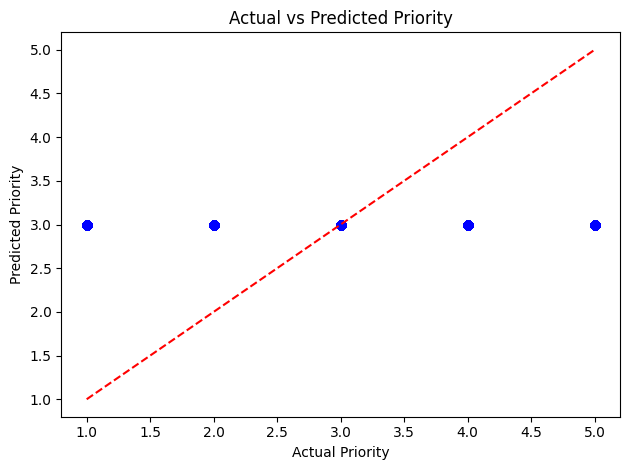

In [ ]:
plt.scatter(y_test_district, y_district_pred, color='blue')

plt.xlabel('Actual Priority')
plt.ylabel('Predicted Priority')
plt.title('Actual vs Predicted Priority')

plt.plot([min(y_test_district), max(y_test_district)], [min(y_test_district), max(y_test_district)], color='red', linestyle='--')

plt.tight_layout()
plt.show()

#### **Machine Learning Analysis: Using District to Predict Priority (Further Exploration)**

After the section above, it was deduced that another relevant feature had to be added in order to increase the accuracy when predicting the priority of a 911 call. Only having district as a feature was not enough so we decided to include the description feature as well.

Since description is also a non-numerical variable, we have to turn it numerical using the label encoder once again.

In [ ]:
ML_priority_df = pd.DataFrame()

ML_priority_df['description'] = encoder.fit_transform(updated_priority_df['description'])
ML_priority_df['priority'] = call_time_df['priority']
ML_priority_df['district'] = encoder.fit_transform(updated_priority_df['district'])

print(ML_priority_df)

         description  priority  district
0               6624       3.0         0
1               1420       3.0         0
2               1420       3.0         0
3               6142       2.0         0
4               1902       3.0        15
...              ...       ...       ...
2792451         2084       2.0        11
2792452         3875       2.0        10
2792453         4674       3.0         0
2792454         2795       3.0         2
2792455         3109       3.0        17

[2792456 rows x 3 columns]


In [ ]:
Y_priority = call_time_df['priority']
print(Y_priority.isna().sum())

0


In [ ]:
X_priority = ML_priority_df.drop(columns = 'priority')
Y_priority = call_time_df['priority']
X_train_priority , X_test_priority , y_train_priority , y_test_priority = train_test_split(X_priority , Y_priority, test_size = 0.2)

scaler = StandardScaler()
X_train_priority_scaled = scaler.fit_transform(X_train_priority)
X_test_priority_scaled = scaler.transform(X_test_priority)

In [ ]:
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_priority_scaled,  y_train_priority, cv = skf, scoring = 'accuracy')
    mean = np.mean(scores)
    std = np.std(scores)
    print("Model Name: " + str(model_name) + ", Mean: " + str(mean) + ", Standard Deviation: " + str(std))

Model Name: Logistic Regression, Mean: 0.5701013981691594, Standard Deviation: 0.0003587659501989165
Model Name: Decision Tree, Mean: 0.970139626188131, Standard Deviation: 8.582729210362637e-05
Model Name: Random Forest, Mean: 0.9697604795547378, Standard Deviation: 0.0001141170009386429


After scaling and training 3 models (Logisitc Regression, Decision Tree, and Random Forest), the results are much more promising compared to the section above. Logistic regression still has a mean accuracy of around .5 but the Decision Tree model and Random Forest model has high mean accuracy of around 0.97. This demonstrates that the model is less likely to underfit with this additional feature and is more likely to accurately predict the priority now. We will continue testing the data with the Decision Tree model as it has the highest mean accuracy and lowest standard deviation.

In [ ]:
decisionTreeModel = DecisionTreeClassifier(random_state=42)
decisionTreeModel.fit(X_train_priority_scaled, y_train_priority)


y_district_pred = decisionTreeModel.predict(X_test_priority_scaled)
accuracy = accuracy_score(y_district_pred, y_test_priority)
print(f"Accuracy of Decision Tree Model: {accuracy:.2f}")
print(classification_report(y_district_pred, y_test_district, zero_division = 0))

Accuracy of Decision Tree Model: 0.97
              precision    recall  f1-score   support

           1       0.12      0.12      0.12     66520
           2       0.23      0.23      0.23    128521
           3       0.49      0.50      0.50    272897
           4       0.16      0.15      0.16     90373
           5       0.00      0.00      0.00       181

    accuracy                           0.34    558492
   macro avg       0.20      0.20      0.20    558492
weighted avg       0.33      0.34      0.33    558492



This classification report is much better than the previous classification report seen in the previous section. The model is actually predicting priorities other than Medium priority. It also has an accuracy of 97% which is much higher than the accuracy of 50% that we calculated from the other report. There is still a slight issue, however. Despite the accuracy being extremely high, all of the precision, recall, and f1-score is still extremely low. This can stem from the data being unevenly distributed which would make sense as the mean priority is medium. It can be concluded that majority of the 911 calls from this dataset is probably classified at a Medium priority which could cause this skewed precision, recall, and f1-score. Another fix could be introducing another feature to balance out the dataset a bit more.

Adding another feature helped us understand that we cannot directly predict the type of priority a call is classified under just from the district it's from as it's mainly influenced by the common crimes that come from that district. Districts with frequent dangerous crimes will probably cause for higher priority calls but we wouldn't be able to conclude this without the description of the crime.

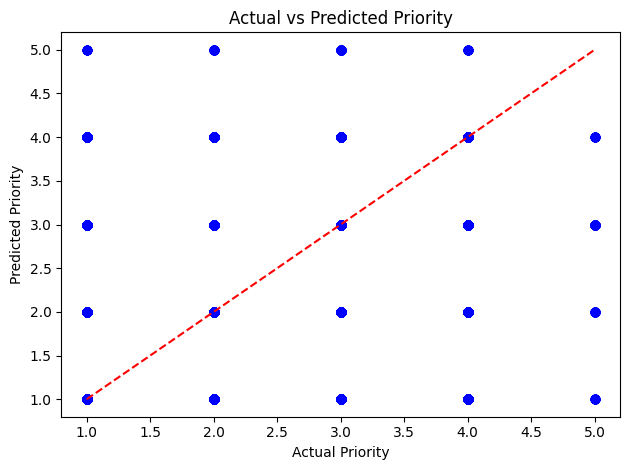

In [ ]:
plt.scatter(y_test_district, y_district_pred, color='blue')

plt.xlabel('Actual Priority')
plt.ylabel('Predicted Priority')
plt.title('Actual vs Predicted Priority')

plt.plot([min(y_test_priority), max(y_test_priority)], [min(y_test_priority), max(y_test_priority)], color='red', linestyle='--')

plt.tight_layout()
plt.show()

# **Conclusion and Next Steps**

This portion of the data science lifecycle is where we finally put the data we have collected, gathered, tested, and analyzed to try to draw broader conclusions about the dataset as a whole.

It seems that, after running many different features against priority, there are a couple conclusions that can be made right off the bat:

If one thing is blatantly clear about the modeling, it is that description is an incredible predictor of priority, meaning that, in the future, we could analyze which specific descriptions seem to capture the most attention from police and if the description's severity seems to match the priority at which police treat it with, and also that police upon being alerted of certain descriptions are automatically prepared to place it under a certain level of priority, no matter what other facts about the situation may be present.

Additionally, without using description as a primary predictor for priority, it seems that both district and time alike are not very good predictors as both needed additional features (ie. descriptions) before the machine learning algorithms could produce a reliable and accurate prediction. This suggests that the Baltimore police don't seem to prioritize any districts over another, and surprisingly are not any more productive at a certain time of day.

If further analysis is needed, one thing that could be potentially worth exploring is the arrival time based on the description and priority in order to see if police not only categorize and prioritize calls based on their description, but also how fast the response time is as well. Another way to expand the scope of the project would be limiting the descriptions down to the top 5 to see if the description's relation to prioritization still holds.